# Импорт библиотек и датасетов

In [1]:
import pandas as pd
df = pd.read_csv("data/df_before_norm.csv")
df_norm = pd.read_csv("data/df_norm.csv")

# Создание нейронной сети

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
X = df_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
Y = df_norm['Соотношение матрица-наполнитель']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [7]:
model = Sequential([
    Dense(12, activation = 'relu', input_dim=12),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1)])

model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

2022-04-24 22:53:14.614540: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
import matplotlib.pyplot as plt
def plot_loss(model_fit):
    plt.figure(figsize = (10, 4))
    plt.style.use('ggplot')
    plt.plot(model_fit.history['loss'], label='loss')
    plt.plot(model_fit.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.ylim(0,5)
    plt.legend()
    plt.grid(True)

In [9]:
model_fit = model.fit(
    X_train,
    Y_train,
    validation_split = 0.2,
    verbose=0, epochs=300)

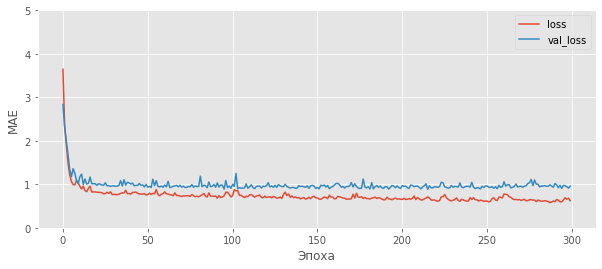

In [12]:
plot_loss(model_fit)

In [13]:
score = model.evaluate(X_test, Y_test, verbose=1)

9/9 [==============================] - 0s 1ms/step - loss: 1.0163 - mae: 0.7963


In [14]:
score = model.evaluate(X_train, Y_train, verbose=1)

21/21 [==============================] - 0s 943us/step - loss: 0.6660 - mae: 0.6517


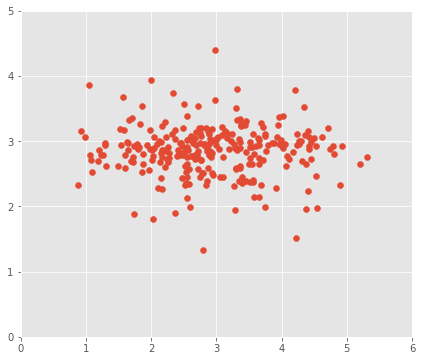

,Тест,Прогноз
827,1.862875,3.538551
699,1.797133,2.886253
891,3.513742,2.986729
385,4.200930,3.790953
154,2.275182,2.733755
...,...,...
0,1.857143,2.531541
721,2.869846,3.170660
66,2.538869,2.361829
522,2.250822,2.729549


In [15]:
pred_test = model.predict(X_test).flatten()
pred = pd.DataFrame({'Тест': Y_test, 'Прогноз': pred_test})

plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
a = plt.axes(aspect='equal')
plt.scatter(Y_test, pred_test)
plt.xlim(0, 6)
plt.ylim(0, 5)
plt.show()

pred

In [16]:
models_path = 'model/'
model.save(models_path + '/model/')

2022-04-24 22:54:12.618642: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model//model/assets
